In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import h5py

from matplotlib import rc
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

import subfunctions as compute

(<mpl_toolkits.axes_grid1.inset_locator.BboxPatch at 0x1c78e9c5d30>,
 <mpl_toolkits.axes_grid1.inset_locator.BboxConnector at 0x1c78e9f74c0>)

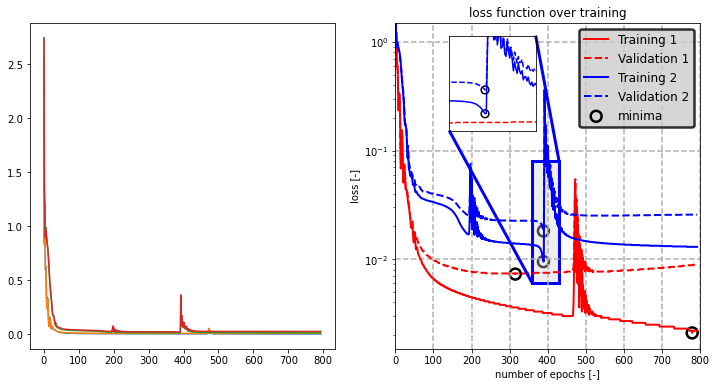

In [2]:
with h5py.File('data/ANN_result.hdf5', 'r') as f:
        training_1 = f['loss_function/dset_1'][:] 
        training_2 = f['loss_function/dset_2'][:] 
losses = np.hstack(( training_1, training_2) )
epochs = np.arange( losses.shape[0])
xmin, ymin = compute.get_min_vals( losses )  
fig, axes = plt.subplots(1,2, figsize= (12,6) )

# plot the bad/no effort plot
axes[0].plot( epochs, training_1[:,0] )
axes[0].plot( epochs, training_1[:,1] )
axes[0].plot( epochs, training_2[:,0] )
axes[0].plot( epochs, training_2[:,1] )

# adding the data to the plot
axes[1].semilogy( epochs, training_1[:,0], 'r',   label='Training 1', lw=2 ) 
axes[1].semilogy( epochs, training_1[:,1], '--r', label='Validation 1', lw=2 )
axes[1].semilogy( epochs, training_2[:,0], 'b',   label='Training 2', lw=2) 
axes[1].semilogy( epochs, training_2[:,1], '--b', label='Validation 2', lw=2) 
axes[1].scatter( xmin[:], ymin[:], edgecolor='k', marker='o' , facecolor='none', s=120, lw=2.5, label='minima') 

## Add a box in the plot which shows the 'interesting part'
inner_ax = plt.axes( [0.61, 0.63, 0.1, 0.22] ) #plt.axes( [left, bottom, width, height ] ) #specifies the corner, as well as its size
inner_ax.semilogy( epochs, training_1[:,0], 'r' ) 
inner_ax.semilogy( epochs, training_1[:,1], '--r')
inner_ax.semilogy( epochs, training_2[:,0], 'b') 
inner_ax.semilogy( epochs, training_2[:,1], '--b') 
inner_ax.scatter( xmin[:], ymin[:], edgecolor='k', marker='o' , facecolor='none', s=60, lw=1.5)
inner_ax.set_xlim( 360,430)
inner_ax.set_ylim( 0.006, 0.08)
plt.setp(inner_ax, xticks=[] ) #remove the ticks #setp -> set_properties( ax_object, properties)
inner_ax.tick_params( axis='y', which='both', left=False, labelleft=False)

## setting a nice layout on the plot
axes[1].set_xlim( 0, 800) 
axes[1].set_ylim( 1.5e-3, 1.5) 
legend_style = dict( fontsize=12, facecolor=(0.8, 0.8, 0.8, 0.6), edgecolor='black') 
compute.layout(axes[1], 'number of epochs [-]', 'loss [-]', title='loss function over training', **legend_style)

# highlight the box which shows the 'interesting part'
translucent_grey = ( 0.8, 0.8, 0.8, 0.35 )
full_translucent = ( 1, 1, 1, 0)
mark_inset( axes[1], inner_ax, loc1=3, loc2=3, facecolor=translucent_grey, edgecolor='black', lw=1.2)
mark_inset( axes[1], inner_ax, loc1=1, loc2=3, facecolor=full_translucent, edgecolor='blue', lw=3) 


[]

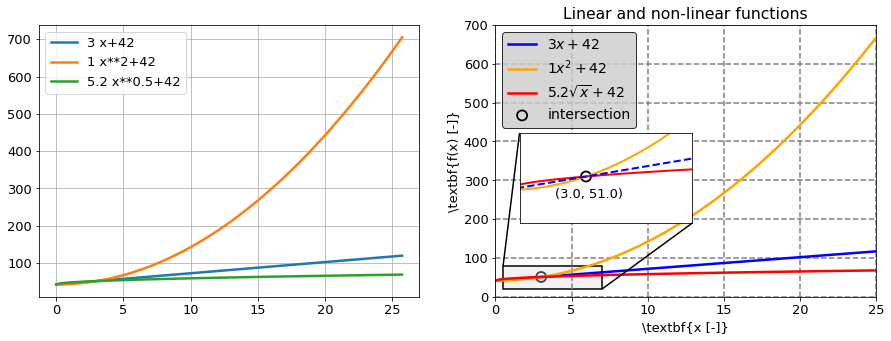

In [5]:
## data creation
c0 = 3
c1 = 1
c2 = 5.2
cc= 42 
x = np.arange(0, 26, 0.25)
y0 = x *c0 +cc
y1 = x**2 * c1 +cc
y2 = x**0.5 * c2 +cc 
## pre processing
intersection = 3.00
marker = '({}, {})'.format( intersection, intersection*c0+cc )

plt.rcParams.update( {'font.size':13} ) 
box_color = (0.85, 0.85, 0.85, 0.3)
legend_style = dict( fontsize=14, facecolor=(0.8, 0.8, 0.8, 0.6), edgecolor='black')

## plotting of data
fig, axes = plt.subplots( 1, 2, figsize=(15,5) )
axes[0].plot( x, y0, lw=2.5, label='{} x+{}'.format(c0, cc) )
axes[0].plot( x, y1, lw=2.5, label='{} x**2+{}'.format(c1, cc) )
axes[0].plot( x, y2, lw=2.5, label='{} x**0.5+{}'.format(c2, cc) ) 

axes[1].plot( x, y0, color='blue', lw=2.5, label=r'{}$ x+{}$'.format(c0, cc) )
axes[1].plot( x, y1, color='orange', lw=2.5, label=r'{}$ x^2+{}$'.format(c1, cc) )
axes[1].plot( x, y2, color='red', lw=2.5, label=r'{}$ \sqrt{{x}}+{}$'.format(c2, cc) ) 
axes[1].scatter( 3, intersection*c0+cc, fc='None', ec='k', s=100, lw=1.8, label='intersection' )

## adding of inset
box = plt.axes( (0.57, 0.33, 0.16, 0.25) ) 
box.plot( x, y1, color='orange', lw=2 )
box.plot( x, y2, color='red', lw=2 ) 
box.plot( x, y0, color='blue', lw=2, ls='--' )
box.scatter( intersection, intersection*c0+cc, fc='None', ec='k', s=100, lw=1.8 ) 

### plot style
axes[0].legend()
axes[0].grid()
mark_inset( axes[1], box, loc1=2, loc2=4, facecolor=box_color, edgecolor='k', lw=1.5 )
axes[1].grid( ls='--', color='gray', linewidth=1.5 )
axes[1].set_xlim( xmin=0, xmax=25)
axes[1].set_ylim( ymin=0, ymax=700 )
axes[1].set_title('Linear and non-linear functions')
axes[1].set_xlabel( r'\textbf{x [-]}' )
axes[1].set_ylabel( r'\textbf{f(x) [-]}' )
axes[1].legend( **legend_style) 

box.set_xlim( xmin=0.5, xmax=7)
box.set_ylim( ymin=20, ymax=80 ) 
box.text( 3.1, 39, marker, horizontalalignment='center', verticalalignment='center')
box.tick_params( axis='y', which='both', left=False, labelleft=False)
plt.setp( box, xticks=[], yticks=[] ) #setp -> set_properties

Text(0.5, 1.0, '\\TeX\\ is Number $\\displaystyle\\sum_{n=1}^\\infty\\frac{-e^{i\\pi}}{2^n}$!')

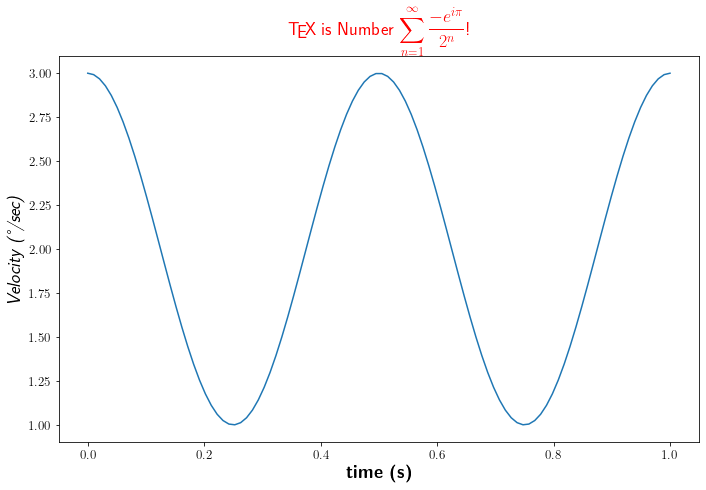

In [16]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['text.usetex'] = True


t = np.linspace(0.0, 1.0, 100)
s = np.cos(4 * np.pi * t) + 2

fig, ax = plt.subplots(figsize=(10, 7), tight_layout=True)
ax.plot(t, s)

ax.set_xlabel(r'\textbf{time (s)}', fontsize=18)
ax.set_ylabel('\\textit{Velocity (\N{DEGREE SIGN}/sec)}', fontsize=18)
ax.set_title(r'\TeX\ is Number $\displaystyle\sum_{n=1}^\infty'
             r'\frac{-e^{i\pi}}{2^n}$!', fontsize=18, color='r')

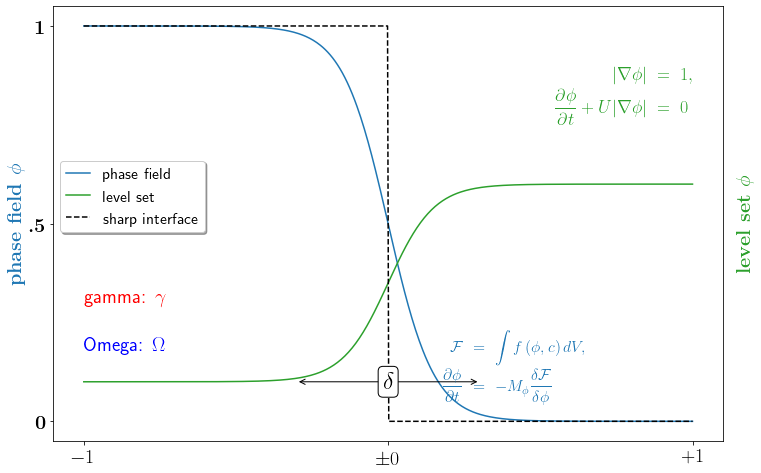

In [12]:
fig, ax = plt.subplots(figsize=(12, 8))
# interface tracking profiles
N = 500
delta = 0.6
X = np.linspace(-1, 1, N)
ax.plot(X, (1 - np.tanh(4 * X / delta)) / 2,    # phase field tanh profiles
        X, (1.4 + np.tanh(4 * X / delta)) / 4, "C2",  # composition profile
        X, X < 0, "k--")                        # sharp interface

# legend
ax.legend(("phase field", "level set", "sharp interface"),
          shadow=True, loc=(0.01, 0.48), handlelength=1.5, fontsize=16)

# the arrow
ax.annotate("", xy=(-delta / 2., 0.1), xytext=(delta / 2., 0.1),
            arrowprops=dict(arrowstyle="<->", connectionstyle="arc3"))
ax.text(0, 0.1, r"$\delta$",
        color="black", fontsize=24,
        horizontalalignment="center", verticalalignment="center",
        bbox=dict(boxstyle="round", fc="white", ec="black", pad=0.2))

# Use tex in labels
ax.set_xticks([-1, 0, 1])
ax.set_xticklabels(["$-1$", r"$\pm 0$", "$+1$"], color="k", size=20)

# Left Y-axis labels, combine math mode and text mode
ax.set_ylabel(r"\bf{phase field} $\phi$", color="C0", fontsize=20)
ax.set_yticks([0, 0.5, 1])
ax.set_yticklabels([r"\bf{0}", r"\bf{.5}", r"\bf{1}"], color="k", size=20)

# Right Y-axis labels
ax.text(1.02, 0.5, r"\bf{level set} $\phi$",
        color="C2", fontsize=20, rotation=90,
        horizontalalignment="left", verticalalignment="center",
        clip_on=False, transform=ax.transAxes)

# Use multiline environment inside a `text`.
# level set equations
eq1 = (r"\begin{eqnarray*}"
       r"|\nabla\phi| &=& 1,\\"
       r"\frac{\partial \phi}{\partial t} + U|\nabla \phi| &=& 0 "
       r"\end{eqnarray*}")
ax.text(1, 0.9, eq1, color="C2", fontsize=18,
        horizontalalignment="right", verticalalignment="top")

# phase field equations
eq2 = (r"\begin{eqnarray*}"
       r"\mathcal{F} &=& \int f\left( \phi, c \right) dV, \\ "
       r"\frac{ \partial \phi } { \partial t } &=& -M_{ \phi } "
       r"\frac{ \delta \mathcal{F} } { \delta \phi }"
       r"\end{eqnarray*}")
ax.text(0.18, 0.18, eq2, color="C0", fontsize=16)

ax.text(-1, .30, r"gamma: $\gamma$", color="r", fontsize=20)
ax.text(-1, .18, r"Omega: $\Omega$", color="b", fontsize=20)

plt.show()